Cargamos los datasets

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [86]:
english_paradetox_df = pd.read_csv("datos/english_paradetox_preprocessed.csv")
english_multilingual_toxicity_df = pd.read_csv("datos/english_multilingual_toxicity_preprocessed.csv")
english_toxic_keywords_df = pd.read_csv("datos/english_toxic_keywords_preprocessed.csv")
english_toxic_spans_df = pd.read_csv("datos/english_toxic_spans_preprocessed.csv")
english_paradetox_test_set_df = pd.read_csv("datos/english_paradetox_test_set_preprocessed.csv")

Análisis de algunas columnas con Bag-of-Words

Palabras más tóxicas de Paradetox: frases tóxicas y neutrales

In [87]:
english_paradetox_df['toxic_sentence_str'] = english_paradetox_df['toxic_sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
english_paradetox_df['neutral_sentence_str'] = english_paradetox_df['neutral_sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

vectorizer_bow = CountVectorizer()
X_toxic_bow = vectorizer_bow.fit_transform(english_paradetox_df['toxic_sentence_str'])
X_neutral_bow = vectorizer_bow.transform(english_paradetox_df['neutral_sentence_str'])

word_counts = np.array(X_toxic_bow.sum(axis=0)).flatten()
words = vectorizer_bow.get_feature_names_out()
top_indices = word_counts.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases tóxicas:")
for i in top_indices:
    print(words[i], word_counts[i])

word_counts_neutral = np.array(X_neutral_bow.sum(axis=0)).flatten()
top_indices_neutral = word_counts_neutral.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases neutrales:")
for i in top_indices_neutral:
    print(words[i], word_counts_neutral[i])

Top 10 palabras más frecuentes en frases tóxicas:
shit 87
fuck 61
fucking 50
get 21
people 21
stupid 17
like 15
article 15
stop 14
think 12
Top 10 palabras más frecuentes en frases neutrales:
people 34
person 26
bad 24
get 22
thing 21
like 20
article 16
stop 15
really 14
re 12


In [88]:
english_multilingual_toxicity_df['text_str'] = english_multilingual_toxicity_df['text_tokens'].apply(
    lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x)
)
X_text_bow = vectorizer_bow.fit_transform(english_multilingual_toxicity_df['text_str'])

word_counts_text = np.array(X_text_bow.sum(axis=0)).flatten()
words_text = vectorizer_bow.get_feature_names_out()
top_indices_text = word_counts_text.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en el dataset Multilingual Toxicity:")
for i in top_indices_text:
    print(words_text[i], word_counts_text[i])

Top 10 palabras más frecuentes en el dataset Multilingual Toxicity:
url 729
woman 426
fuck 396
bitch 375
like 337
people 321
love 303
as 242
fucking 239
white 221


In [89]:
english_toxic_spans_df['Sentence_str'] = english_toxic_spans_df['Sentence_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
english_toxic_spans_df['Negative Connotations_str'] = english_toxic_spans_df['Negative Connotations_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))

vectorizer_sentence = CountVectorizer()
X_sentence_bow = vectorizer_sentence.fit_transform(english_toxic_spans_df['Sentence_str'])

word_counts_sentence = np.array(X_sentence_bow.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence.get_feature_names_out()
top_indices_sentence = word_counts_sentence.argsort()[::-1][:10]

print("Top 10 palabras más frecuentes en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], word_counts_sentence[i])

vectorizer_negative = CountVectorizer()
X_negative_bow = vectorizer_negative.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

word_counts_negative = np.array(X_negative_bow.sum(axis=0)).flatten()
words_negative = vectorizer_negative.get_feature_names_out()
top_indices_negative = word_counts_negative.argsort()[::-1][:10]

print("\nTop 10 palabras más frecuentes en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], word_counts_negative[i])


Top 10 palabras más frecuentes en frases tóxicas:
shit 210
fuck 159
fucking 134
people 56
like 52
get 45
stupid 44
stop 37
give 37
page 36

Top 10 palabras más frecuentes en connotaciones negativas:
shit 209
fuck 158
fucking 134
stupid 44
idiot 29
as 28
fucked 28
dick 26
cunt 22
hell 21


In [90]:
vectorizer_tfidf = TfidfVectorizer()
X_toxic_tfidf = vectorizer_tfidf.fit_transform(english_paradetox_df['toxic_sentence_str'])
X_neutral_tfidf = vectorizer_tfidf.transform(english_paradetox_df['neutral_sentence_str'])

# Obtener palabras y sus "importancias" totales (suma de TF-IDF por palabra)
tfidf_scores_toxic = np.array(X_toxic_tfidf.sum(axis=0)).flatten()
tfidf_scores_neutral = np.array(X_neutral_tfidf.sum(axis=0)).flatten()
words = vectorizer_tfidf.get_feature_names_out()

# Top 10 palabras con mayor TF-IDF en frases tóxicas
top_indices_toxic = tfidf_scores_toxic.argsort()[::-1][:10]
print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_toxic:
    print(words[i], tfidf_scores_toxic[i])

# Top 10 palabras con mayor TF-IDF en frases neutrales
top_indices_neutral = tfidf_scores_neutral.argsort()[::-1][:10]
print("Top 10 palabras con mayor TF-IDF en frases neutrales:")
for i in top_indices_neutral:
    print(words[i], tfidf_scores_neutral[i])

Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 18.28972122222328
fuck 16.359097821387362
fucking 13.170626013547754
get 6.24108346226068
people 6.186986680102589
stupid 6.044056693631494
give 5.642601486408178
dick 5.443859872318509
article 5.003552234047351
stop 4.738384932628404
Top 10 palabras con mayor TF-IDF en frases neutrales:
person 13.106796008722371
bad 12.66099648161129
people 10.250959603425644
thing 8.712534172669871
get 7.2486731343441155
care 6.50504539948046
like 6.491238122946108
article 5.788535674141514
stop 5.59377086700648
anything 4.972603034549697


In [91]:
vectorizer_sentence_tfidf = TfidfVectorizer()
X_sentence_tfidf = vectorizer_sentence_tfidf.fit_transform(english_toxic_spans_df['Sentence_str'])

tfidf_scores_sentence = np.array(X_sentence_tfidf.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence_tfidf.get_feature_names_out()
top_indices_sentence = tfidf_scores_sentence.argsort()[::-1][:10]

print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], tfidf_scores_sentence[i])

# TF-IDF para palabras anotadas como negativas
vectorizer_negative_tfidf = TfidfVectorizer()
X_negative_tfidf = vectorizer_negative_tfidf.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

tfidf_scores_negative = np.array(X_negative_tfidf.sum(axis=0)).flatten()
words_negative = vectorizer_negative_tfidf.get_feature_names_out()
top_indices_negative = tfidf_scores_negative.argsort()[::-1][:10]

print("\nTop 10 palabras con mayor TF-IDF en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], tfidf_scores_negative[i])

Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 42.18388820183688
fuck 38.49558781014845
fucking 31.950765108626562
people 15.637035292247655
give 15.117053310936704
like 14.129861576562536
stupid 13.642080626232609
get 13.325038373049157
dick 11.864413517457544
stop 11.770412794081182

Top 10 palabras con mayor TF-IDF en connotaciones negativas:
shit 139.6059986713561
fuck 117.73029430535641
fucking 90.13859820090603
stupid 37.093153396283576
fucked 26.154340699959757
idiot 24.59738840577523
dick 21.653606553795203
as 17.93503580869092
cunt 16.45707324009507
hell 16.151085004951142


In [92]:
# TF-IDF para frases completas
vectorizer_sentence_tfidf = TfidfVectorizer()
X_sentence_tfidf = vectorizer_sentence_tfidf.fit_transform(english_toxic_spans_df['Sentence_str'])

tfidf_scores_sentence = np.array(X_sentence_tfidf.sum(axis=0)).flatten()
words_sentence = vectorizer_sentence_tfidf.get_feature_names_out()
top_indices_sentence = tfidf_scores_sentence.argsort()[::-1][:10]

print("Top 10 palabras con mayor TF-IDF en frases tóxicas:")
for i in top_indices_sentence:
    print(words_sentence[i], tfidf_scores_sentence[i])

# TF-IDF para palabras anotadas como negativas
vectorizer_negative_tfidf = TfidfVectorizer()
X_negative_tfidf = vectorizer_negative_tfidf.fit_transform(english_toxic_spans_df['Negative Connotations_str'])

tfidf_scores_negative = np.array(X_negative_tfidf.sum(axis=0)).flatten()
words_negative = vectorizer_negative_tfidf.get_feature_names_out()
top_indices_negative = tfidf_scores_negative.argsort()[::-1][:10]

print("\nTop 10 palabras con mayor TF-IDF en connotaciones negativas:")
for i in top_indices_negative:
    print(words_negative[i], tfidf_scores_negative[i])


Top 10 palabras con mayor TF-IDF en frases tóxicas:
shit 42.18388820183688
fuck 38.49558781014845
fucking 31.950765108626562
people 15.637035292247655
give 15.117053310936704
like 14.129861576562536
stupid 13.642080626232609
get 13.325038373049157
dick 11.864413517457544
stop 11.770412794081182

Top 10 palabras con mayor TF-IDF en connotaciones negativas:
shit 139.6059986713561
fuck 117.73029430535641
fucking 90.13859820090603
stupid 37.093153396283576
fucked 26.154340699959757
idiot 24.59738840577523
dick 21.653606553795203
as 17.93503580869092
cunt 16.45707324009507
hell 16.151085004951142


Embedings

Word2Vec-Paradetox

In [93]:
from gensim.models import Word2Vec
from gensim import utils
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Callback para monitorizar el entrenamiento
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss


In [94]:
class ParadetoxCorpus:
    """Iterador sobre frases tokenizadas del dataset Paradetox"""

    def __init__(self, df):
        self.df = df

    def __iter__(self):
        # Itera sobre todas las frases tóxicas y neutrales
        for tokens in self.df['toxic_sentence_tokens']:
            yield tokens
        for tokens in self.df['neutral_sentence_tokens']:
            yield tokens


In [95]:
def ensure_list(tokens):
    if isinstance(tokens, str):
        # Evalúa la cadena para convertirla a lista
        return eval(tokens)
    return tokens

english_paradetox_df['toxic_sentence_tokens'] = english_paradetox_df['toxic_sentence_tokens'].apply(ensure_list)
english_paradetox_df['neutral_sentence_tokens'] = english_paradetox_df['neutral_sentence_tokens'].apply(ensure_list)

sentences = ParadetoxCorpus(english_paradetox_df)
epoch_logger = EpochLogger()

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=200,
    window=5,
    min_count=1,
    negative=5,
    compute_loss=True,
    callbacks=[epoch_logger],
    epochs=50000
)

# Guardar el modelo
w2v_model.save("english_paradetox_w2v.model")


Loss after epoch 0: 16112.1435546875
Loss after epoch 1: 16113.0732421875
Loss after epoch 2: 16080.212890625
Loss after epoch 3: 16156.7265625
Loss after epoch 4: 16089.859375
Loss after epoch 5: 16046.6171875
Loss after epoch 6: 16119.8671875
Loss after epoch 7: 16029.40625
Loss after epoch 8: 16171.8125
Loss after epoch 9: 16141.59375
Loss after epoch 10: 16032.59375
Loss after epoch 11: 15950.28125
Loss after epoch 12: 15510.375
Loss after epoch 13: 15139.9375
Loss after epoch 14: 14490.484375
Loss after epoch 15: 13680.15625
Loss after epoch 16: 13032.890625
Loss after epoch 17: 12554.75
Loss after epoch 18: 12107.75
Loss after epoch 19: 11824.28125
Loss after epoch 20: 11507.34375
Loss after epoch 21: 11443.6875
Loss after epoch 22: 11277.15625
Loss after epoch 23: 11148.15625
Loss after epoch 24: 11034.59375
Loss after epoch 25: 10959.46875
Loss after epoch 26: 10959.21875
Loss after epoch 27: 10902.21875
Loss after epoch 28: 10944.8125
Loss after epoch 29: 10863.1875
Loss after

c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


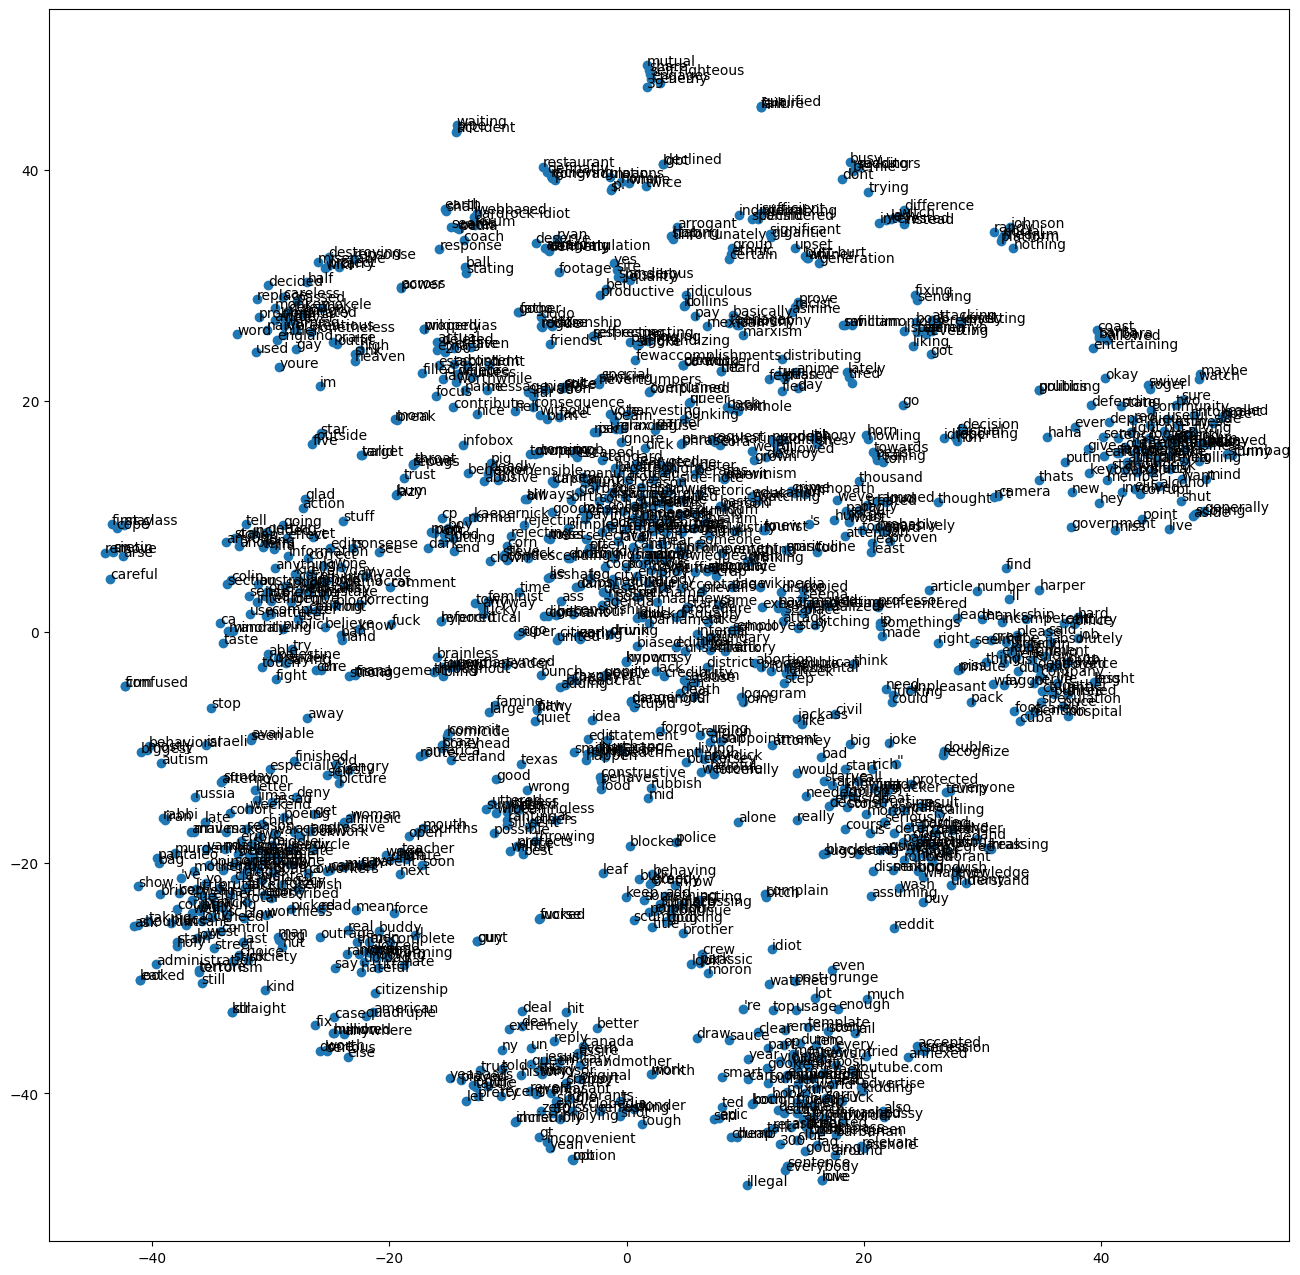

In [96]:
# Tomamos las 2000 palabras más frecuentes
words = list(w2v_model.wv.index_to_key)[:2000]
vectors = [w2v_model.wv[word] for word in words]

from sklearn.decomposition import PCA

pca = PCA(n_components=50)
vectors_pca = pca.fit_transform(vectors)

# t-SNE
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=10)
tsne_vectors = tsne.fit_transform(np.array(vectors))

# Visualización
plt.figure(figsize=(16, 16))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))
plt.show()


Wors2Vec-Multilingual Toxicity

Loss after epoch 0: 60812.58203125
Loss after epoch 1: 60118.70703125
Loss after epoch 2: 59820.2890625
Loss after epoch 3: 63977.625
Loss after epoch 4: 59116.703125
Loss after epoch 5: 59173.25
Loss after epoch 6: 59751.3125
Loss after epoch 7: 59502.75
Loss after epoch 8: 59967.71875
Loss after epoch 9: 59377.9375
Loss after epoch 10: 59269.9375
Loss after epoch 11: 59627.75
Loss after epoch 12: 59559.5625
Loss after epoch 13: 59300.6875
Loss after epoch 14: 59164.75
Loss after epoch 15: 64930.125
Loss after epoch 16: 59097.5625
Loss after epoch 17: 59474.125
Loss after epoch 18: 59077.25
Loss after epoch 19: 59725.0
Loss after epoch 20: 59174.5
Loss after epoch 21: 59565.125
Loss after epoch 22: 59189.875
Loss after epoch 23: 58945.75
Loss after epoch 24: 58734.375
Loss after epoch 25: 59523.625
Loss after epoch 26: 59689.5
Loss after epoch 27: 59418.0
Loss after epoch 28: 59141.25
Loss after epoch 29: 59266.125
Loss after epoch 30: 59062.125
Loss after epoch 31: 59726.125
Loss aft

Loss after epoch 0: 73145.2421875
Loss after epoch 1: 73172.9765625
Loss after epoch 2: 70413.859375
Loss after epoch 3: 63250.796875
Loss after epoch 4: 57106.78125
Loss after epoch 5: 53937.1875
Loss after epoch 6: 51992.78125
Loss after epoch 7: 51134.9375
Loss after epoch 8: 50194.6875
Loss after epoch 9: 49370.5
Loss after epoch 10: 48608.9375
Loss after epoch 11: 47955.125
Loss after epoch 12: 47273.125
Loss after epoch 13: 46829.5
Loss after epoch 14: 45965.9375
Loss after epoch 15: 45501.5
Loss after epoch 16: 44709.9375
Loss after epoch 17: 43916.9375
Loss after epoch 18: 43350.4375
Loss after epoch 19: 42477.1875
Loss after epoch 20: 42003.625
Loss after epoch 21: 41027.25
Loss after epoch 22: 40201.25
Loss after epoch 23: 39449.25
Loss after epoch 24: 38786.75
Loss after epoch 25: 37580.375
Loss after epoch 26: 36819.125
Loss after epoch 27: 35770.75
Loss after epoch 28: 35004.125
Loss after epoch 29: 33956.125
Loss after epoch 30: 33218.625
Loss after epoch 31: 32166.25
Los

c:\Users\js834\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


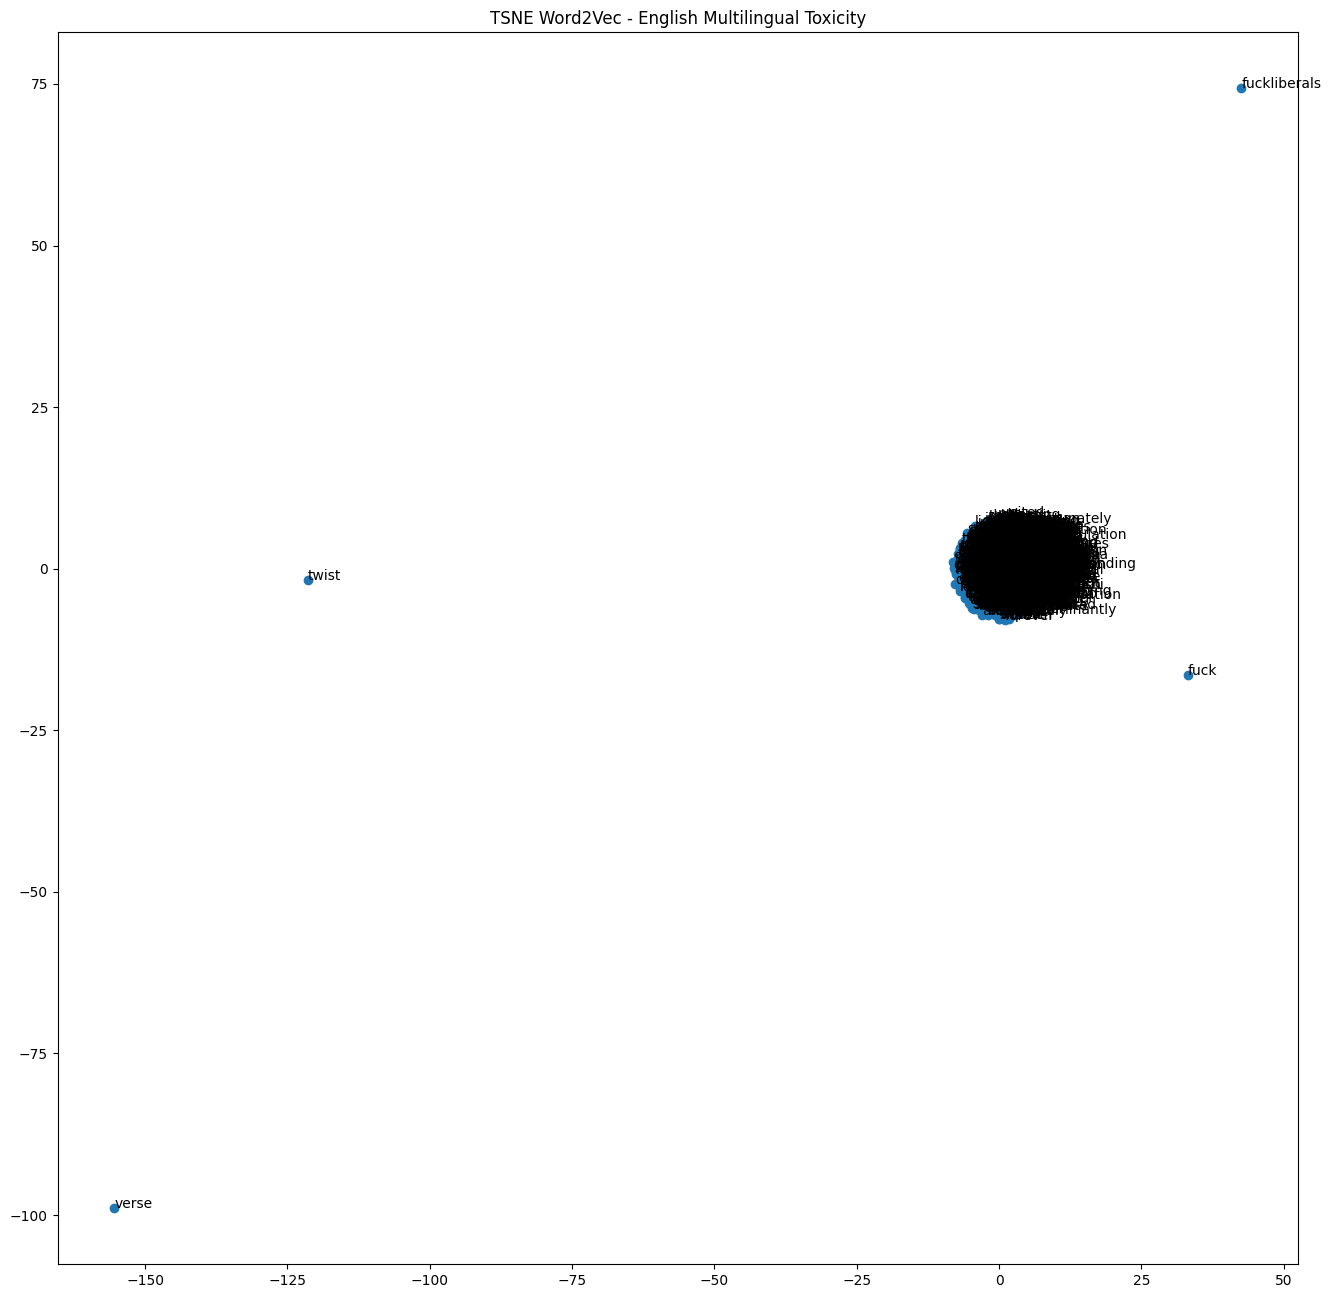

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Función para asegurar que los tokens son listas
def ensure_list(tokens):
    if isinstance(tokens, str):
        return eval(tokens)
    return tokens

# Cargar dataset preprocesado
english_multilingual_toxicity_df = pd.read_csv("datos/english_multilingual_toxicity_preprocessed.csv")

# Asegurar que la columna de tokens es lista
english_multilingual_toxicity_df['text_tokens'] = english_multilingual_toxicity_df['text_tokens'].apply(ensure_list)

# Callback para mostrar el loss durante entrenamiento de Word2Vec
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print(f"Loss after epoch {self.epoch}: {loss}")
        else:
            print(f"Loss after epoch {self.epoch}: {loss - self.loss_previous_step}")
        self.epoch += 1
        self.loss_previous_step = loss

epoch_logger = EpochLogger()

# Preparar las "sentencias" para Word2Vec
sentences = english_multilingual_toxicity_df['text_tokens'].tolist()

# Entrenar modelo Word2Vec
model_w2v = Word2Vec(
    sentences=sentences,
    vector_size=200,
    window=5,
    min_count=1,
    compute_loss=True,
    negative=5,
    epochs=50000,
    callbacks=[epoch_logger]
)

# Guardar el modelo
model_w2v.save("english_multilingual_toxicity_w2v.model")

# Visualización con TSNE
# Tomamos las primeras 2000 palabras más frecuentes
words = list(model_w2v.wv.index_to_key)[:2000]
vectors = [model_w2v.wv[word] for word in words]

tsne = TSNE(n_components=2, random_state=0, n_iter=3000, perplexity=50)
tsne_vectors = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(16, 16))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))

plt.title("TSNE Word2Vec - English Multilingual Toxicity")
plt.show()
